In [1]:
# libraries
#%matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib
import seaborn
import matplotlib.dates as md
from matplotlib import pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm # not available on Kaggle Kernel
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

In [2]:
# some function for later

# return Series of distance between each point and his distance with the closest centroid
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

# train markov model to get transition matrix
def getTransitionMatrix (df):
	df = np.array(df)
	model = msm.estimate_markov_model(df, 1)
	return model.transition_matrix

def markovAnomaly(df, windows_size, threshold):
    transition_matrix = getTransitionMatrix(df)
    real_threshold = threshold**windows_size
    df_anomaly = []
    for j in range(0, len(df)):
        if (j < windows_size):
            df_anomaly.append(0)
        else:
            sequence = df[j-windows_size:j]
            sequence = sequence.reset_index(drop=True)
            df_anomaly.append(anomalyElement(sequence, real_threshold, transition_matrix))
    return df_anomaly

In [3]:
df = pd.read_csv(r"D:\New_Fourth_Year\Microcontroller\Gas_Sensors_Measurements.csv")

In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial Number  6400 non-null   int64 
 1   MQ6            6400 non-null   int64 
 2   Gas            6400 non-null   object
dtypes: int64(2), object(1)
memory usage: 150.1+ KB
None


In [5]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named df
# Randomize the data
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Create a timedelta range with a frequency of 1 second
time_range = pd.to_timedelta(np.arange(len(df)), unit='s')

# Create a new datetime column by adding the time range to a base datetime
base_datetime = pd.to_datetime('2023-01-01')  # Replace with your desired base datetime
df['Datetime'] = base_datetime + time_range
# Assuming your DataFrame is named df
df = pd.get_dummies(df, columns=['Gas'], prefix='Gas')
# Drop Gas columns from the DataFrame
df.drop(['Gas_Mixture', 'Gas_Perfume', 'Gas_Smoke'], axis=1, inplace=True)
# Display the updated DataFrame
print(df)


      Serial Number  MQ6            Datetime  Gas_NoGas
0                 0  338 2023-01-01 00:00:00       True
1                 1  339 2023-01-01 00:00:01       True
2                 2  337 2023-01-01 00:00:02       True
3                 3  336 2023-01-01 00:00:03       True
4                 4  337 2023-01-01 00:00:04       True
...             ...  ...                 ...        ...
6395           1595  414 2023-01-01 01:46:35      False
6396           1596  411 2023-01-01 01:46:36      False
6397           1597  407 2023-01-01 01:46:37      False
6398           1598  405 2023-01-01 01:46:38      False
6399           1599  402 2023-01-01 01:46:39      False

[6400 rows x 4 columns]


In [6]:
# Assuming your DataFrame is named df
from IPython.display import display

display(df)


,Serial Number,MQ6,Datetime,Gas_NoGas
0,0,338,2023-01-01 00:00:00,True
1,1,339,2023-01-01 00:00:01,True
2,2,337,2023-01-01 00:00:02,True
3,3,336,2023-01-01 00:00:03,True
4,4,337,2023-01-01 00:00:04,True
...,...,...,...,...
6395,1595,414,2023-01-01 01:46:35,False
6396,1596,411,2023-01-01 01:46:36,False
6397,1597,407,2023-01-01 01:46:37,False
6398,1598,405,2023-01-01 01:46:38,False


In [7]:
# check the timestamp format and frequence 
print(df['Datetime'].head(10))

0   2023-01-01 00:00:00
1   2023-01-01 00:00:01
2   2023-01-01 00:00:02
3   2023-01-01 00:00:03
4   2023-01-01 00:00:04
5   2023-01-01 00:00:05
6   2023-01-01 00:00:06
7   2023-01-01 00:00:07
8   2023-01-01 00:00:08
9   2023-01-01 00:00:09
Name: Datetime, dtype: datetime64[ns]


In [8]:
# check the temperature mean
print(df['MQ6'].mean())

399.75875


In [9]:
# check the timestamp format and frequence 
print(df['MQ6'].head(10))

0    338
1    339
2    337
3    336
4    337
5    337
6    337
7    337
8    337
9    337
Name: MQ6, dtype: int64


C:\Users\Jerico\AppData\Local\Temp\ipykernel_27464\1622220492.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MQ6_scaled'] = np_scaled
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\use

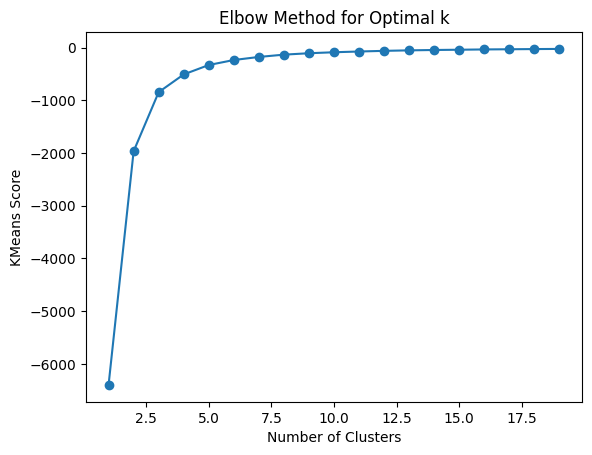

c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


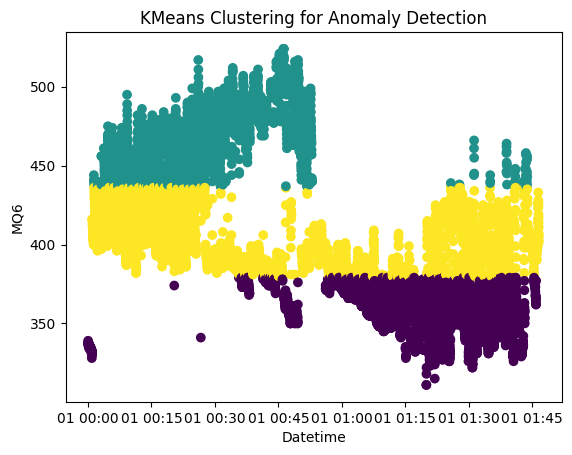

In [10]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'MQ6' to numeric (if it's not already)
df['MQ6'] = pd.to_numeric(df['MQ6'], errors='coerce')

# Select features for anomaly detection
data = df[['MQ6', 'Datetime']]

# Standardize the 'MQ6' values
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data[['MQ6']])
data['MQ6_scaled'] = np_scaled

# Elbow Method to find the optimal number of clusters
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data[['MQ6_scaled']]) for i in n_clusters]
scores = [kmeans[i].score(data[['MQ6_scaled']]) for i in range(len(kmeans))]

# Plot the elbow curve
fig, ax = plt.subplots()
ax.plot(n_clusters, scores, marker='o')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('KMeans Score')
ax.set_title('Elbow Method for Optimal k')
plt.show()

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3  # Change this based on your observation from the plot

# Fit KMeans with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k)
data['Cluster'] = kmeans_model.fit_predict(data[['MQ6_scaled']])

# Visualize the clusters
plt.scatter(data['Datetime'], data['MQ6'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Datetime')
plt.ylabel('MQ6')
plt.title('KMeans Clustering for Anomaly Detection')
plt.show()


C:\Users\Jerico\AppData\Local\Temp\ipykernel_27464\1595598416.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MQ6_scaled'] = np_scaled
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\use

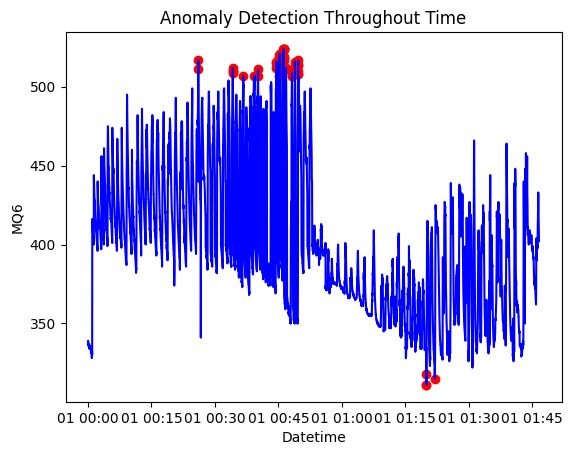

In [11]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'MQ6' to numeric (if it's not already)
df['MQ6'] = pd.to_numeric(df['MQ6'], errors='coerce')

# Select features for anomaly detection
data = df[['MQ6', 'Datetime']]

# Standardize the 'MQ6' values
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data[['MQ6']])
data['MQ6_scaled'] = np_scaled

# Elbow Method to find the optimal number of clusters
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data[['MQ6_scaled']]) for i in n_clusters]
scores = [kmeans[i].score(data[['MQ6_scaled']]) for i in range(len(kmeans))]

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3  # Change this based on your observation from the plot

# Fit KMeans with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k)
data['Cluster'] = kmeans_model.fit_predict(data[['MQ6_scaled']])

# Get the distance between each point and its nearest centroid
distance = pd.Series(kmeans_model.transform(data[['MQ6_scaled']]).min(axis=1), index=data.index)

# Set the outliers fraction
outliers_fraction = 0.01  # You can adjust this value

# Get the threshold for anomalies
number_of_outliers = int(outliers_fraction * len(distance))
threshold = distance.nlargest(number_of_outliers).min()

# Identify anomalies
df['anomaly21'] = (distance >= threshold).astype(int)

# Visualize anomalies throughout time
fig, ax = plt.subplots()
anomalies = df[df['anomaly21'] == 1]
ax.plot(df['Datetime'], df['MQ6'], color='blue')
ax.scatter(anomalies['Datetime'], anomalies['MQ6'], color='red')
plt.xlabel('Datetime')
plt.ylabel('MQ6')
plt.title('Anomaly Detection Throughout Time')
plt.show()


C:\Users\Jerico\AppData\Local\Temp\ipykernel_27464\1595598416.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MQ6_scaled'] = np_scaled
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\useGPU\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Jerico\anaconda3\envs\use

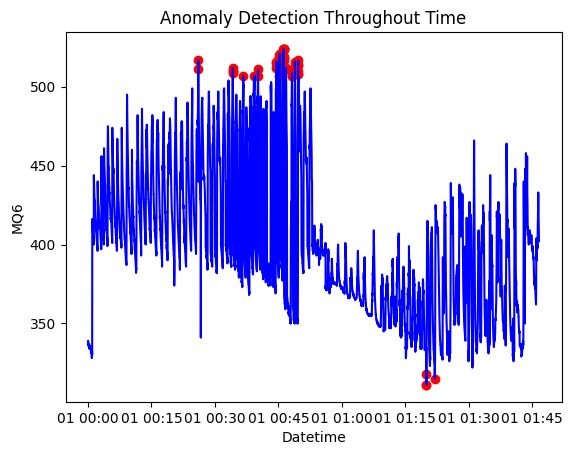

In [12]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df
# Convert 'MQ6' to numeric (if it's not already)
df['MQ6'] = pd.to_numeric(df['MQ6'], errors='coerce')

# Select features for anomaly detection
data = df[['MQ6', 'Datetime']]

# Standardize the 'MQ6' values
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data[['MQ6']])
data['MQ6_scaled'] = np_scaled

# Elbow Method to find the optimal number of clusters
n_clusters = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data[['MQ6_scaled']]) for i in n_clusters]
scores = [kmeans[i].score(data[['MQ6_scaled']]) for i in range(len(kmeans))]

# Choose the optimal number of clusters based on the elbow plot
optimal_k = 3  # Change this based on your observation from the plot

# Fit KMeans with the chosen number of clusters
kmeans_model = KMeans(n_clusters=optimal_k)
data['Cluster'] = kmeans_model.fit_predict(data[['MQ6_scaled']])

# Get the distance between each point and its nearest centroid
distance = pd.Series(kmeans_model.transform(data[['MQ6_scaled']]).min(axis=1), index=data.index)

# Set the outliers fraction
outliers_fraction = 0.01  # You can adjust this value

# Get the threshold for anomalies
number_of_outliers = int(outliers_fraction * len(distance))
threshold = distance.nlargest(number_of_outliers).min()

# Identify anomalies
df['anomaly21'] = (distance >= threshold).astype(int)

# Visualize anomalies throughout time
fig, ax = plt.subplots()
anomalies = df[df['anomaly21'] == 1]
ax.plot(df['Datetime'], df['MQ6'], color='blue')
ax.scatter(anomalies['Datetime'], anomalies['MQ6'], color='red')
plt.xlabel('Datetime')
plt.ylabel('MQ6')
plt.title('Anomaly Detection Throughout Time')
plt.show()


In [13]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import time

# Assuming your DataFrame is named df
# Convert 'MQ6' to numeric (if it's not already)
df['MQ6'] = pd.to_numeric(df['MQ6'], errors='coerce')

# Select features for time series prediction
data_n = df[['MQ6', 'Datetime']]

# Standardize the 'MQ6' values
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data_n[['MQ6']])
data_n.loc[:, 'MQ6_scaled'] = np_scaled.copy()

# Parameters and train/test size
prediction_time = 1
testdatasize = 1000
unroll_length = 50
testdatacut = testdatasize + unroll_length + 1

# Train data
x_train = data_n[0:-prediction_time - testdatacut]['MQ6_scaled'].to_numpy()
y_train = data_n[prediction_time:-testdatacut]['MQ6_scaled'].to_numpy()

# Test data
x_test = data_n[0 - testdatacut:-prediction_time]['MQ6_scaled'].to_numpy()
y_test = data_n[prediction_time - testdatacut:]['MQ6_scaled'].to_numpy()

# Unroll: create a sequence of 50 previous data points for each data point
def unroll(data, sequence_length=24):
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    return np.asarray(result)

# Train data
x_train = unroll(x_train, unroll_length)
y_train = y_train[unroll_length:]

# Test data
x_test = unroll(x_test, unroll_length)
y_test = y_test[unroll_length:]

# Display the shape
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)






x_train (5298, 50)
y_train (5298,)
x_test (1000, 50)
y_test (1000,)


C:\Users\Jerico\AppData\Local\Temp\ipykernel_27464\2170088841.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n.loc[:, 'MQ6_scaled'] = np_scaled.copy()


In [14]:
# Build the model
model = Sequential()

model.add(LSTM(units=50, input_shape=(unroll_length, 1), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))  # Increased units and return sequences
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))  # Another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('linear'))

start = time.time()

model.compile(loss='mse', optimizer='rmsprop')
print('Compilation time: {}'.format(time.time() - start))

Compilation time: 0.0060577392578125


In [15]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=3028,
    epochs=30,
    validation_split=0.3)

Epoch 1/30
2/2 [==============================] - 7s 742ms/step - loss: 1.0735 - val_loss: 0.4169
Epoch 2/30
2/2 [==============================] - 0s 73ms/step - loss: 0.8649 - val_loss: 0.5992
Epoch 3/30
2/2 [==============================] - 0s 68ms/step - loss: 0.6684 - val_loss: 0.5416
Epoch 4/30
2/2 [==============================] - 0s 65ms/step - loss: 0.5630 - val_loss: 0.5708
Epoch 5/30
2/2 [==============================] - 0s 66ms/step - loss: 0.4766 - val_loss: 0.5006
Epoch 6/30
2/2 [==============================] - 0s 67ms/step - loss: 0.5032 - val_loss: 0.5161
Epoch 7/30
2/2 [==============================] - 0s 74ms/step - loss: 0.4104 - val_loss: 0.5131
Epoch 8/30
2/2 [==============================] - 0s 67ms/step - loss: 0.3750 - val_loss: 0.4907
Epoch 9/30
2/2 [==============================] - 0s 67ms/step - loss: 0.3580 - val_loss: 0.3601
Epoch 10/30
2/2 [==============================] - 0s 67ms/step - loss: 0.4146 - val_loss: 0.3407
Epoch 11/30
2/2 [===========

In [16]:

# Save the model
model.save('micro_v1.h5')

In [17]:
# create the list of difference between prediction and test data
loaded_model = model.load(r'D:\New_Fourth_Year\Microcontroller\micro_v1.h5')
diff=[]
ratio=[]
p = loaded_model.predict(y_test)
# predictions = lstm.predict_sequences_multiple(loaded_model, x_test, 50, 50)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))
# plot the prediction and the reality (for the test data)
fig, axs = plt.subplots()
axs.plot(y_test,color='blue', label='y_test')
axs.plot(p,color='red', label='prediction')
plt.legend(loc='upper left')
plt.show()

AttributeError: 'Sequential' object has no attribute 'load'

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(x_test, y_test)
print(f'Test Loss (MSE): {loss}')


32/32 [==============================] - 0s 8ms/step - loss: 0.2484
Test Loss (MSE): 0.2483760416507721


In [ ]:
from sklearn.metrics import mean_absolute_error

# Predict on the test set
y_pred = model.predict(x_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MAE: {mae}')


32/32 [==============================] - 0s 6ms/step
Test MAE: 0.3935867917144991
